# Final Project: Digit Recognizer - An Active Kaggle Competition
## Name: Gopi Miyani (10437266)
- Kaggle Competition Link: https://www.kaggle.com/c/digit-recognizer/overview
- Goal: To identify digits from hand-written images

# 1. Data Preparation

### 1.1 Load Data 

In [51]:
# Import Libraries

import numpy as np
import pandas as pd
from IPython.display import display, HTML

# Load Data

train_data=pd.read_csv('Data/train.csv')
print('\n--------------------------- Training Data ---------------------------\n')
print(display(train_data))
test_data=pd.read_csv('Data/test.csv')
print('\n\n------------------------- Test Data -------------------------------\n')
print(display(test_data))
print('\nShape of train_data: '+str(train_data.shape))
print('Shape of test data: '+str(test_data.shape))


--------------------------- Training Data ---------------------------



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


None


------------------------- Test Data -------------------------------



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


None

Shape of train_data: (42000, 785)
Shape of test data: (28000, 784)


In [52]:
# Extract input features and labels from tarinning data into x_train and y_train

x_train = train_data.drop(labels='label',axis=1)
#print('\n------------------ x_train Data Head ------------------\n' +str(x_train.head))
#print('\n------------------y_train Data Head ------------------\n' +str(y_train.head))
y_train=train_data['label']
print('Shape of x_train: ' +str(x_train.shape))
print('Shape of y_train: ' +str(y_train.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))


Shape of x_train: (42000, 784)
Shape of y_train: (42000,)
number of classes: 10


### 1.2 Perform Data Analysis

In [53]:
# Perform analysis of train and test data

print('------------------------- Train Data Analysis ------------------------\n')
print(display(x_train.describe()))
print('\n\n--------------------- Test Data Analysis -------------------------\n')
print(display(test_data.describe()))
print('\n\n---------- Missing Values --------------');
print('\nMissing values in x_train: '+str(x_train.isnull().sum().sum()))
print('Missing values in y_train: '+str(y_train.isnull().sum().sum()))
print('Missing values in test data: '+str(test_data.isnull().sum().sum()))

------------------------- Train Data Analysis ------------------------



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


None


--------------------- Test Data Analysis -------------------------



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


None


---------- Missing Values --------------

Missing values in x_train: 0
Missing values in y_train: 0
Missing values in test data: 0



--------------------- Distribution of Data Over Labels -------------------


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

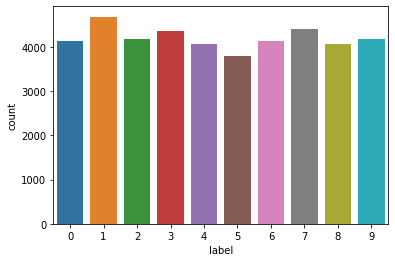

In [54]:
# Obeserve distribution of data over labels

import seaborn as sns

print('\n--------------------- Distribution of Data Over Labels -------------------')
g = sns.countplot(y_train)
y_train.value_counts()

### 1.3 Data Standardization

In [55]:
# Reshape x_tarin and test data 
x_train=x_train.values.reshape(-1,28,28,1)
test_data=test_data.values.reshape(-1,28,28,1)

mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px


print('Shape of x_train' +str(x_train.shape))
print('Shape of test_data' +str(test_data.shape))

Shape of x_train(42000, 28, 28, 1)
Shape of test_data(28000, 28, 28, 1)


### 1.4 One-hot encode the labels
In the input, a label is a scalar in  {0,1,⋯,9} . However, such labels are not easily trainable and it is thus easier to train on an encoding of the labels. Here, a one-hot encoding is used for this purpose.

In [56]:
from keras.utils import to_categorical

def to_one_hot(y, num_class=10):
    return to_categorical(y)

y_train= to_categorical(y_train,num_classes=10)
print('Shape of y_train' +str(y_train.shape))

Shape of y_train(42000, 10)


### 1.5 Randomly partition the training set to training and validation sets
Randomly partition the 42K training samples to 2 sets:

- A training set containing 90% of total samples
- A validation set containing 10% of total samples

In [57]:
from sklearn.model_selection import train_test_split

# Train-validation split 

'''
rand_indices = np.random.permutation(42000)
train_indices = rand_indices[0:37800]
valid_indices = rand_indices[37800:42000]

x_val = x_train[valid_indices, :]
y_val = y_train[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train[train_indices, :]
'''

r_seed = 2
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=r_seed)


print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))


Shape of x_tr: (37800, 28, 28, 1)
Shape of y_tr: (37800, 10)
Shape of x_val: (4200, 28, 28, 1)
Shape of y_val: (4200, 10)


# 2. Method:  CNN2

### 2.1. Perform Data Augmentation 
To increase the model accuracy, I used data augmentation to increase the amount of data available to the model. Fortunately, Keras provides a model.fit_generator() utility. To make use of this, I used the ImageDataGenerator class to generate the samples.

In [58]:
from keras.preprocessing.image import ImageDataGenerator

# Image generator for training

def make_image_data_generator(X):
    datagen = ImageDataGenerator(
            rotation_range=8, 
            width_shift_range=0.08, 
            shear_range=0.3,
            height_shift_range=0.08, 
            zoom_range=0.08
    ) 
    datagen.fit(X)
    return datagen

# Create an image data generator for the training data
datagen=make_image_data_generator(x_tr)

### 2.2. Build CNN Model 

In [59]:
# Import Libraires

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.layers.normalization import BatchNormalization

def make_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3)),
        BatchNormalization(axis=1),
        model.add(layers.Activation('relu'))
        Convolution2D(32,(3,3)),
        BatchNormalization(axis=1),
        model.add(layers.Activation('relu'))
        MaxPooling2D(),
        Convolution2D(64,(3,3)),
        BatchNormalization(axis=1),
        model.add(layers.Activation('relu'))
        Convolution2D(64,(3,3)),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        model.add(layers.Activation('relu'))
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

In [60]:
# Make CNN Model

model = make_cnn_model()

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_8 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 12, 12, 32)        48        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)       

In [61]:
from keras import optimizers
from keras.optimizers import Adam ,RMSprop

learning_rate = 0.001 
optimizer = RMSprop(lr=learning_rate, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit_generator(datagen.flow(x_tr,y_tr, batch_size=64),
                              epochs = 5, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_tr.shape[0] 
                             )

Epoch 1/5
37800/37800 [==============================] - 3850s 102ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0264 - val_accuracy: 0.9938
Epoch 2/5
37800/37800 [==============================] - 3762s 100ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0289 - val_accuracy: 0.9952
Epoch 3/5
37800/37800 [==============================] - 3675s 97ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0279 - val_accuracy: 0.9943
Epoch 4/5
37800/37800 [==============================] - 3706s 98ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0265 - val_accuracy: 0.9955
Epoch 5/5
37800/37800 [==============================] - 3610s 95ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0459 - val_accuracy: 0.9950


### 2.3. Compare results with simple baseline
Here, for baseline, I have used linear logistic regression model

In [66]:
#calculate accuracy
from sklearn import metrics
print('--------------------- Comparision of CNN with Baseline ------------------')
print('\nValidation Accuracy Score (Logistic Regression): 0.9121428571428571') # This is calculated in Digit Recognizer 4_Logisitic Regression.ipynb.
print('Validation Accuracy Score (CNN): ' +str(history.history['val_accuracy'][4]))



--------------------- Comparision of CNN with Baseline ------------------

Validation Accuracy Score (Logistic Regression): 0.9121428571428571
Validation Accuracy Score (CNN): 0.9950000047683716


### 2.4. Predict labels for test data and save the results for submission

In [70]:
predicitons = model.predict(test_data)
predicitons = np.argmax(predicitons,axis = 1)
predicitons = pd.Series(predicitons,name="Label")

In [71]:
submission_results = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predicitons],axis = 1)

submission_results.to_csv("Submissions/DR_Submission_CNN_11_30_v1.csv",index=False)

### 2.6. Public Score of Kaggle Competion: 0.99485